# 时间数据的处理与pandas的简单作图

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import pylab
import matplotlib.pyplot as plt

## 时间数据类型与转化

* 时间戳–timestamp

#### 定义时间戳

In [7]:
pd.Series([23,4])

0    23
1     4
dtype: int64

In [8]:
pd.DataFrame({2:[3,4],4:[2,3]})

,2,4
0,3,2
1,4,3


In [4]:
pd.to_datetime("20110404")

Timestamp('2011-04-04 00:00:00')

In [5]:
pd.to_datetime("2011/4/4")

Timestamp('2011-04-04 00:00:00')

In [6]:
pd.to_datetime("2011 4 4")

Timestamp('2011-04-04 00:00:00')

In [8]:
#pd.to_datetime("2011年04月04日")

In [3]:
pd.to_datetime(["2011/4/4","04/04/2011"])

DatetimeIndex(['2011-04-04', '2011-04-04'], dtype='datetime64[ns]', freq=None)

In [14]:
pd.Series(["2011-4-4","20110404"])

0    2011-4-4
1    20110404
dtype: object

In [4]:
r1=pd.Series(["2011-4-4","20110404"])
pd.to_datetime(r1)

0   2011-04-04
1   2011-04-04
dtype: datetime64[ns]

### classwork1

In [4]:
#请把字符串“20181201”转换为时间戳

In [22]:
#请下载taobao数据，并导入，注意更改目录


,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


In [6]:
# 请把上面r1的第四列的数据的值前面都添加一个“2011/”，使得所有数据都变成类似“2011/07/04”的形式，并替代原始列

,user,brand,behavr,date
0,10944750,13451,0,2011/06/04
1,10944750,13451,2,2011/06/04
2,10944750,13451,2,2011/06/04
3,10944750,13451,0,2011/06/04
4,10944750,13451,0,2011/06/04


In [5]:
#请把已经变为标准形式第四列数据都转换为时间戳，并替代原始列

In [25]:
r1.head()

,user,brand,behavr,date
0,10944750,13451,0,2011-06-04
1,10944750,13451,2,2011-06-04
2,10944750,13451,2,2011-06-04
3,10944750,13451,0,2011-06-04
4,10944750,13451,0,2011-06-04


In [26]:
r1.date

0        2011-06-04
1        2011-06-04
2        2011-06-04
3        2011-06-04
4        2011-06-04
            ...    
182875   2011-07-30
182876   2011-07-30
182877   2011-08-12
182878   2011-08-08
182879   2011-08-08
Name: date, Length: 182880, dtype: datetime64[ns]

### 定义时间戳序列与周期的定义

* m月，D天，W星期，Y年

In [24]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

In [25]:
r = pd.date_range('1/10/2011', periods=10, freq='5y')#用这个月最后一天代表这个月
r

DatetimeIndex(['2011-12-31', '2016-12-31', '2021-12-31', '2026-12-31',
               '2031-12-31', '2036-12-31', '2041-12-31', '2046-12-31',
               '2051-12-31', '2056-12-31'],
              dtype='datetime64[ns]', freq='5A-DEC')

In [18]:
#以时间戳为键的数据框
rng = pd.date_range('2019-01-01', periods=16, freq='D')
f1=pd.DataFrame({"a":np.random.randint(0,10,size=(len(rng))),"b":np.random.randint(0,10,size=(len(rng)))}, index=rng)
f1

,a,b
2019-01-01,5,0
2019-01-02,8,5
2019-01-03,7,4
2019-01-04,8,1
2019-01-05,5,0
2019-01-06,7,8
2019-01-07,3,4
2019-01-08,7,3
2019-01-09,8,2
2019-01-10,5,0


In [84]:
f1.loc["2019-01-01"]

a    5
b    0
Name: 2019-01-01 00:00:00, dtype: int32

## 分组采样

* 注意7D与1W的区别

### 数据框的索引为时间

In [50]:
f1

,a,b
2019-01-01,5,0
2019-01-02,8,5
2019-01-03,7,4
2019-01-04,8,1
2019-01-05,5,0
2019-01-06,7,8
2019-01-07,3,4
2019-01-08,7,3
2019-01-09,8,2
2019-01-10,5,0


In [51]:
f1.groupby(pd.Grouper(freq='5D')).size()# 默认grouper对索引进行分组
#grouper函数是专门用来生成时间分组序列的函数，默认情况下是对数据框的键进行处理
#相比resample，grouper功能更加强大

2019-01-01    5
2019-01-06    5
2019-01-11    5
2019-01-16    1
Freq: 5D, dtype: int64

In [52]:
f1.groupby(pd.Grouper(freq='5D')).sum()

,a,b
2019-01-01,33,10
2019-01-06,30,17
2019-01-11,32,27
2019-01-16,7,2


In [32]:
f1.groupby(pd.Grouper(freq='w')).size()

2019-01-06    6
2019-01-13    7
2019-01-20    3
Freq: W-SUN, dtype: int64

In [54]:
#分组迭代
k=0
for i in f1.groupby(["a",pd.Grouper(freq='5D')]):
    print(i[1])

            a  b
2019-01-14  0  9
            a  b
2019-01-07  3  4
            a  b
2019-01-01  5  0
2019-01-05  5  0
            a  b
2019-01-10  5  0
            a  b
2019-01-03  7  4
            a  b
2019-01-06  7  8
2019-01-08  7  3
            a  b
2019-01-11  7  4
2019-01-13  7  3
            a  b
2019-01-16  7  2
            a  b
2019-01-02  8  5
2019-01-04  8  1
            a  b
2019-01-09  8  2
            a  b
2019-01-12  9  2
2019-01-15  9  9


### 索引不为时间

* set_index

* pd.Grouper(key="date",freq='5D')

In [55]:
#已知一个数据框，时间数据并不是键
rng = pd.date_range('2000-01-01', periods=10, freq='D')
f2=pd.DataFrame({"a":np.random.randint(0,10,size=(len(rng))),"b":np.random.randint(0,10,size=(len(rng))),"date":rng})
f2

,a,b,date
0,5,7,2000-01-01
1,3,4,2000-01-02
2,9,1,2000-01-03
3,9,9,2000-01-04
4,0,9,2000-01-05
5,2,0,2000-01-06
6,5,9,2000-01-07
7,3,8,2000-01-08
8,6,8,2000-01-09
9,9,7,2000-01-10


In [85]:
f2[f2.date=="2000-01-02"]#注意切片的格式

,a,b,date
1,3,4,2000-01-02


In [65]:
#下面的命令是把数据的date列设置为索引
f3=f2.set_index('date')
f3.head()

,a,b
date,,
2000-01-01,5,7
2000-01-02,3,4
2000-01-03,9,1
2000-01-04,9,9
2000-01-05,0,9


In [56]:
f2.groupby(["b",pd.Grouper(key="date",freq='5D')]).sum()
#grouper还可以用在不以日期为键的数据里

a
b date         
0 2000-01-06  2
1 2000-01-01  9
4 2000-01-01  3
7 2000-01-01  5
  2000-01-06  9
8 2000-01-06  9
9 2000-01-01  9
  2000-01-06  5

## classwork2

In [21]:
# 请使用grouper的方式通过r1(r1的date不是索引)求每周的总购买量

date
2011-04-17    164
2011-04-24    328
2011-05-01    317
2011-05-08    287
2011-05-15    376
2011-05-22    406
2011-05-29    342
2011-06-05    339
2011-06-12    330
2011-06-19    439
2011-06-26    369
2011-07-03    433
2011-07-10    463
2011-07-17    487
2011-07-24    323
2011-07-31    611
2011-08-07    435
2011-08-14    449
2011-08-21     86
Freq: W-SUN, dtype: int64

In [62]:
# 请使用grouper的方式通过r1求每周的总浏览量


date
2011-04-17     3957
2011-04-24     8129
2011-05-01     7318
2011-05-08     7953
2011-05-15     8025
2011-05-22     9761
2011-05-29     9128
2011-06-05     9716
2011-06-12     9226
2011-06-19     9928
2011-06-26     9582
2011-07-03    10671
2011-07-10    11744
2011-07-17    13311
2011-07-24     9878
2011-07-31    12298
2011-08-07    10204
2011-08-14    11459
2011-08-21     2251
Freq: W-SUN, dtype: int64

In [63]:
#求周转化率（周购买除以周浏览）


date
2011-04-17    0.041446
2011-04-24    0.040349
2011-05-01    0.043318
2011-05-08    0.036087
2011-05-15    0.046854
2011-05-22    0.041594
2011-05-29    0.037467
2011-06-05    0.034891
2011-06-12    0.035768
2011-06-19    0.044218
2011-06-26    0.038510
2011-07-03    0.040577
2011-07-10    0.039424
2011-07-17    0.036586
2011-07-24    0.032699
2011-07-31    0.049683
2011-08-07    0.042630
2011-08-14    0.039183
2011-08-21    0.038205
Freq: W-SUN, dtype: float64

In [64]:
#求各个品牌的月度浏览数


brand  date      
11     2011-04-30      1
       2011-06-30      3
15     2011-05-31      1
       2011-07-31      2
       2011-08-31      3
                    ... 
29547  2011-07-31    161
       2011-08-31      2
29551  2011-05-31      3
       2011-08-31      6
29552  2011-07-31      2
Length: 20448, dtype: int64

## 基于pandas 的简单可视化


* plot(kind="bar")

kind : str
‘line’ : line plot (default)#折线图
‘bar’ : vertical bar plot#条形图
‘barh’ : horizontal bar plot#横向条形图
‘hist’ : histogram#柱状图
‘box’ : boxplot#箱线图
‘kde’ : Kernel Density Estimation plot#Kernel 的密度估计图，主要对柱状图添加Kernel 概率密度线
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot#饼图
‘scatter’ : scatter plot#散点图  需要传入columns方向的索引
‘hexbin’ : hexbin plot#


见pandas官方文档：pandas-document/user_guide/visualization.html

pandas.plot() 参数详解 https://blog.csdn.net/u012155582/article/details/100132543


* unstack 让行标变列名

* value_counts 对值计数

In [67]:
w1=r1[r1.behavr==1].groupby(pd.Grouper(key="date",freq="W")).size()
w1

date
2011-04-17    164
2011-04-24    328
2011-05-01    317
2011-05-08    287
2011-05-15    376
2011-05-22    406
2011-05-29    342
2011-06-05    339
2011-06-12    330
2011-06-19    439
2011-06-26    369
2011-07-03    433
2011-07-10    463
2011-07-17    487
2011-07-24    323
2011-07-31    611
2011-08-07    435
2011-08-14    449
2011-08-21     86
Freq: W-SUN, dtype: int64

<AxesSubplot:xlabel='date'>

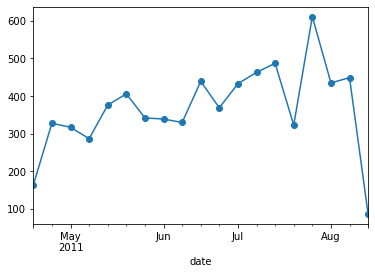

In [69]:
w1.plot(style="-o")

<AxesSubplot:xlabel='date'>

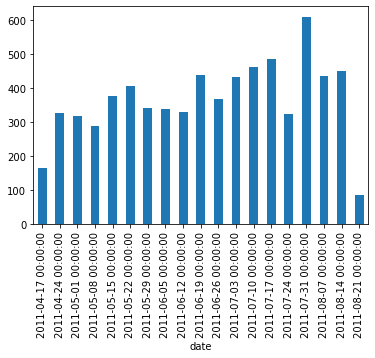

In [70]:
w1.plot(kind="bar")

<AxesSubplot:ylabel='None'>

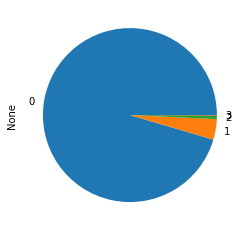

In [33]:
r1.groupby("behavr").size().plot(kind="pie")#各个行为的记录数占比

In [72]:
b1=r1.groupby(["brand","behavr"]).size()
b1

brand  behavr
11     0         4
15     0         6
18     0         1
19     0         2
       1         1
                ..
29547  3         1
29551  0         9
       1         1
       2         1
29552  0         2
Length: 12571, dtype: int64

In [83]:
#help(b1.unstack)

In [81]:
b2=b1.unstack(fill_value=0)#unstack的作用是把行标变为列名，默认变最里面的行标
b2

behavr,0,1,2,3
brand,,,,
11,4,0,0,0
15,6,0,0,0
18,1,0,0,0
19,2,1,0,0
20,5,0,0,0
...,...,...,...,...
29539,9,1,0,0
29541,16,0,0,0
29547,357,7,4,1


<AxesSubplot:xlabel='0', ylabel='1'>

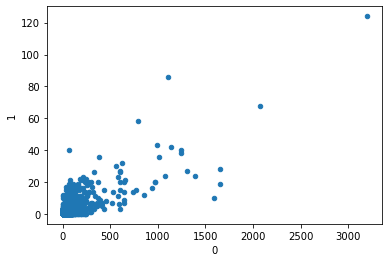

In [82]:
b2.plot(kind="scatter",x=0,y=1)#x,y分别定义了可视化的横轴和纵轴对应于数据的哪两列

[]

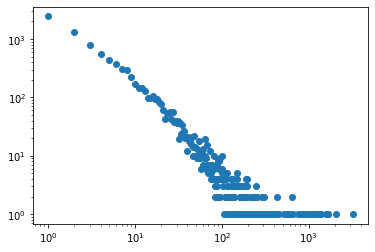

In [47]:
#分布统计
r1[r1.behavr==0].groupby("brand").size().value_counts().plot(style="o").loglog()#value_counts是对序列的值计数

## classwork3

<AxesSubplot:xlabel='date'>

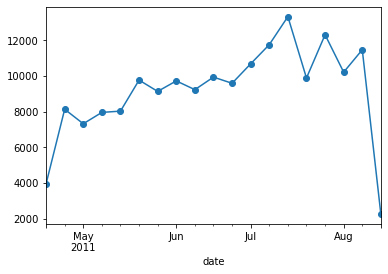

In [103]:
#周总浏览量的折线图


<AxesSubplot:xlabel='date'>

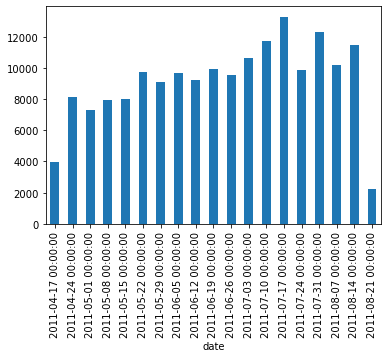

In [90]:
#周总浏览的柱图


<AxesSubplot:ylabel='None'>

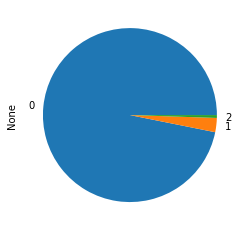

In [91]:
#2011-05-01 那天四种行为比例的pit图


In [93]:
#各个用户的各种行为数量


user      behavr
19500     0         305
          1          10
29750     0          14
38250     0         393
          1          10
                   ... 
12386500  2           1
12388250  0         166
          1           2
12417500  0           7
          1          26
Length: 1952, dtype: int64

In [97]:
#通过unstack把行为数量以如下形式展现


behavr,0,1,2,3
user,,,,
19500,305,10,0,0
29750,14,0,0,0
38250,393,10,0,3
39750,14,0,0,0
42000,255,3,0,0
...,...,...,...,...
12377250,373,22,1,1
12384250,79,3,0,0
12386500,16,2,1,0


<AxesSubplot:xlabel='0', ylabel='1'>

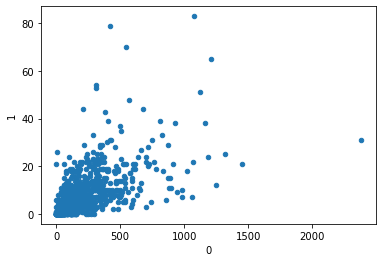

In [98]:
#横轴为用户的浏览量纵轴为用户购买量，做各个用户的行为散点图


<AxesSubplot:xlabel='2', ylabel='1'>

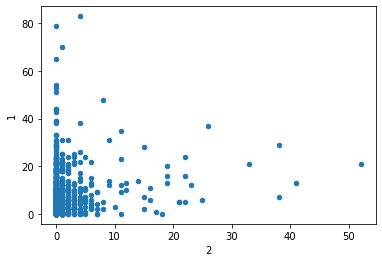

In [102]:
#横轴为用户的收藏量纵轴为用户购买量，做各个用户的行为散点图
